In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

(3000, 4000, 3)


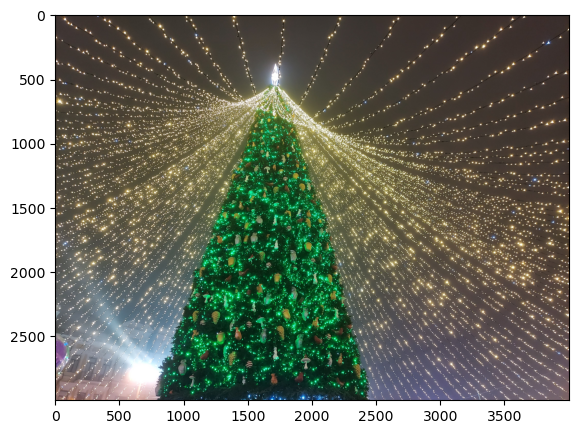

In [2]:
img = cv2.imread('pine.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print (img.shape)

[2.65625    2.60204082 2.68421053]
[96 98 95]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3ff6b58fd0>)

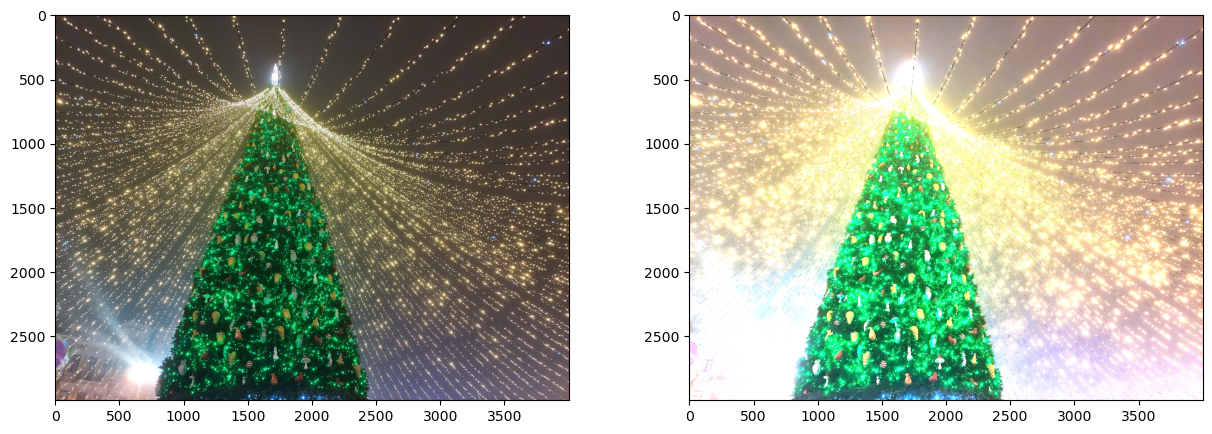

In [3]:

# Define white patch and the coefficients
row, col = 500, 1600 
white = img[row, col, :]
coeffs = 255.0/white
print(coeffs)
print (white)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

In [4]:
# Load your image
img = cv2.imread('pine.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)
print(mean_r,mean_g,mean_b)
kg = 1
kr = kg * mean_g/mean_r
kb = kr * mean_r/mean_b
print(kr,kg, kb)


86.52651583333333 91.63820725 74.72773975
1.0590765890367382 1 1.2262943795245727


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3ff3dd3850>)

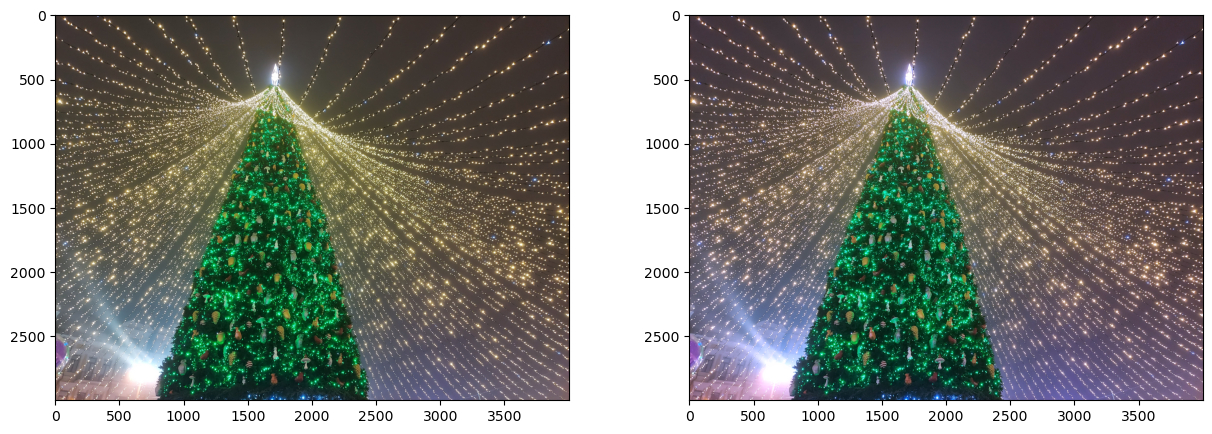

In [5]:
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

coeffs = [kr,kg,kb]
# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    
balanced = balanced/255
balanced[balanced > 1] = 1
# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

[[57 55 52 ... 23 25 27]
 [57 54 53 ... 24 25 29]
 [55 52 52 ... 25 27 29]
 ...
 [21 21 20 ... 21 22 22]
 [22 23 21 ... 20 21 22]
 [23 23 20 ... 19 21 21]]
[148, 117, 147]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3ff05710d0>)

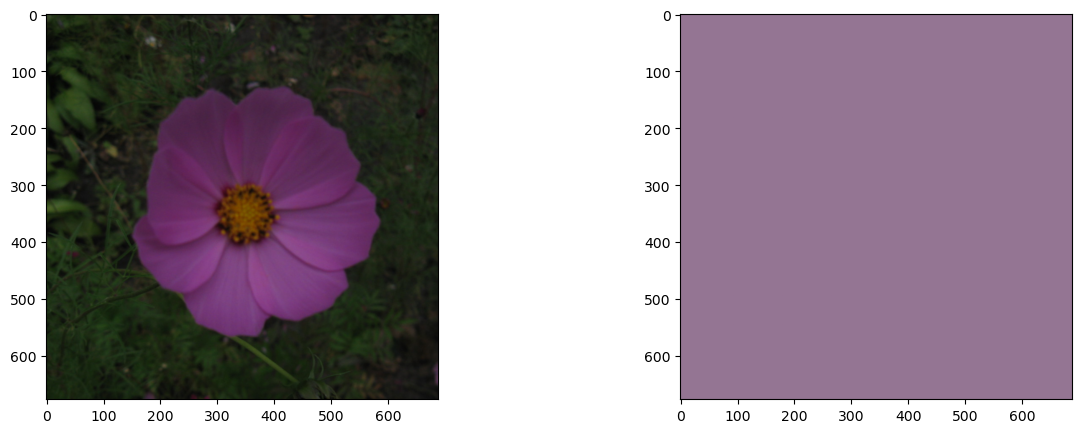

In [19]:
# Load your image
img = cv2.imread('flower.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red, green, blue = cv2.split(img)

print(red)
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)

coeffs = [max_r, max_g, max_b]
print(coeffs)

balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = coeffs[channel]
# Apply scale-by-max balancing and generate the balanced image
#balanced =

balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)